# Random Forest Example using Iris Dataset 

In [7]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
import pandas
import numpy
numpy.random.seed = 0

### Import Data 

In [8]:
data = pandas.read_csv("/users/danielcorcoran/desktop/github_repos/python_nb_visualization/seaborn_official_datasets/iris.csv")

In [9]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Split dataset into training and testing sets 

In [22]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data.drop(["species"], axis = 1), 
                                                data["species"],
                                               random_state = 42,
                                               test_size = 0.20)

In [14]:
ytest.shape

(38,)

### Instantiate model using randomforestclassifier object

In [23]:
clf = RandomForestClassifier(n_jobs = 2,
                            random_state = 0)

### Fit model to training data

In [24]:
clf.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Predict against Xtest set using model

In [25]:
prediction = clf.predict(Xtest)

### Show Accuracy Score

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(prediction, ytest)

1.0

### Confusion Matrix, predicted vs true labels

Text(90.7738,0.5,'Predicted label')

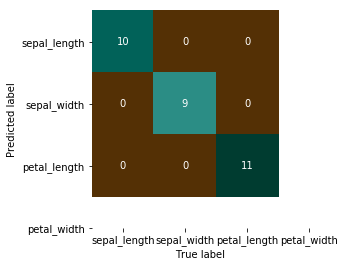

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn
import matplotlib.pyplot as plt

matrix = confusion_matrix(ytest, prediction)
seaborn.heatmap(matrix.T, 
                square = True, 
                annot = True, 
                fmt = "d", 
                cmap = "BrBG",
                cbar = False,
                xticklabels = Xtrain.columns,
                yticklabels = Xtrain.columns)

plt.xlabel("True label")
plt.ylabel("Predicted label")